In [2]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from collections import Counter
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (GradientBoostingRegressor, 
                              RandomForestRegressor,
                              AdaBoostRegressor)
from sklearn.svm import SVR, SVC
import sklearn.model_selection as cv
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import mean_squared_error, log_loss, r2_score, mean_absolute_error
from sklearn.metrics import *
from collections import defaultdict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [9]:
!pwd

/Users/raffi/Desktop/galvanize/predicting_engagement/notebooks


In [10]:
clean_df = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/clean_df.csv')
mna_df = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/mn_aesthetic.csv')
mnt_df = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/mn_technical.csv')
x_predict = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/x_predict.csv')
vgg19_predict = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/vgg19_predict.csv')
x_features = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/x_features.csv')

clean_df.shape, mna_df.shape, mnt_df.shape, x_predict.shape, vgg19_predict.shape, x_features.shape

((5637, 42), (5636, 5), (5636, 5), (5636, 3), (5636, 3), (5636, 4))

In [13]:
# save_for_later = ['edge_media_to_parent_comment.count', 'edge_media_preview_comment.count',
#                  'edge_media_preview_like.count', 'parent_comments_text', 'preview_comments_text',
#                  'comments_text', 'bag_of_words', 'like_ratio', 'comment_ratio', 'mean_norm_like_ratio', 
#                   'minmax_norm_like_ratio', 'mean_norm_comment_ratio', 'minmax_norm_comment_ratio',
#                  'image_may_contain', 'username_free_caption', 'comment_hashtags', 'bow',
#                  'image_label_and_caption', 'engagement_label']
# keep_columns = ['owner.username', 'shortcode', 'datetime', '__typename','owner.edge_owner_to_timeline_media.count', 'owner.edge_followed_by.count',
#                 'tagged_users', 'caption', 'community_louvain', 'community_raffi', 'like_ratio', 'comment_ratio',
#                 'year', 'month', 'day_of_week', 'hour', 'caption_hashtags', 'edge_media_to_parent_comment.count', 
#                'edge_media_preview_like.count', 'engagement_ratio', 'engagement_label']
# df = clean_df[keep_columns].copy()
# df = pd.get_dummies(df, columns = ['__typename'], prefix = ['type'], drop_first= True)
# df.rename(columns = {'owner.edge_owner_to_timeline_media.count': 'posts', 'owner.edge_followed_by.count': 'followed_by',
#                     'edge_media_to_parent_comment.count': 'comment_count', 'edge_media_preview_like.count': 'like_count',
#                     'owner.username': 'username', 'community_louvain': 'louvain', 'community_raffi': 'raffi'}, inplace = True)
# mna_df.rename(columns = {'shortcodes': 'shortcode'}, inplace = True)
# mnt_df.rename(columns = {'shortcodes': 'shortcode'}, inplace = True)
# df = pd.get_dummies(df, columns = ['louvain'], prefix = ['l_'], drop_first= True)
# df = pd.get_dummies(df, columns = ['raffi'], prefix = ['r_'], drop_first= True)
# df.fillna('', inplace = True)

# #new columns
# df['date'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# df['number_of_tagged_users'] = df.tagged_users.str.split().apply(len)
# df['number_of_caption_words'] = df.caption.str.split().apply(len)
# df['number_of_caption_hashtags'] = df.caption_hashtags.str.split().apply(len)
# df.sort_values(by = 'date', ascending = False, inplace = True)
# df['days_since_last_post'] = df.groupby('username')['date'].diff().apply(lambda x: -x.days)
# df = pd.merge(df, mna_df, how = 'left', on = 'shortcode')
# df = pd.merge(df, mnt_df, how = 'left', on = 'shortcode')
# df = pd.merge(df, x_predict, how = 'left', on = 'shortcode')
# df = pd.merge(df, x_features, how = 'left', on = 'shortcode')
# df['predictions'] = df['predictions'].apply(lambda x: str(x)[2:-2])
# df['x_predict'] = pd.to_numeric(df['predictions'])
# df = pd.merge(df, vgg19_predict, how = 'left', on = 'shortcode')
# df['predictions_y'] = df['predictions_y'].apply(lambda x: str(x)[2:-2])
# df['vgg19_predict'] = pd.to_numeric(df['predictions_y'])
# df['new_engagement'] = df['like_ratio'] + df['comment_ratio']


# df.fillna(0, inplace = True)

# keep_external = ['datetime', 'posts', 'followed_by','year',
#        'month', 'day_of_week', 'hour','comment_count',
#        'like_count', 'engagement_ratio',
#        'type_GraphSidecar', 'type_GraphVideo', 'l__1', 'l__2', 'l__3', 'l__4',
#        'l__5', 'l__6', 'l__7',
#        'number_of_tagged_users', 'number_of_caption_words',
#        'number_of_caption_hashtags', 'days_since_last_post',
#        'mean_aesthetic_x', 'std_aesthetic_x',
#        'mean_aesthetic_y', 'std_aesthetic_y',
#        'x_predict', 'vgg19_predict']

# external_df = df[keep_external].copy()
# external_df.rename(columns = {'number_of_tagged_users': 'tagged_users', 'number_of_caption_words': 'caption_words', 'number_of_caption_hashtags': 'caption_hashtags', 'mean_aesthetic_x': 'aesthetic', 'std_aesthetic_x': 'std_aesthetic', 'mean_aesthetic_y': 'technical', 'std_aesthetic_y': 'std_technical'}, inplace = True)

# external_df.to_csv('~/Desktop/galvanize/capstone_3/external_df.csv')

In [24]:
df = pd.read_csv('~/Desktop/galvanize/predicting_engagement_v1/notebooks/csv/external_df.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('datetime', axis = 1, inplace = True)

In [25]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 2000, n_jobs = -1)
knn = KNeighborsRegressor()

models = [lr, rf, knn]
model_names = ['lr', 'rf', 'knn']



def get_train_test_split(df):
    """Get numerical columns from df, return X and y"""
    X = df.drop('engagement_ratio', axis = 1).copy()
    Y = df['engagement_ratio']
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
    return X_train, X_test, y_train, y_test

def run_model(models, X_train, X_test, y_train, y_test):
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mse = mean_squared_error(y_test, yhat)
        mae = mean_absolute_error(y_test, yhat)
        r2 = r2_score(y_test, yhat)
        rmse = np.sqrt(mse)
        print(f'{model_name} r2: {r2:.3f}, mae: {mae:.3f}, mse: {mse:.3f}, rmse: {rmse:.3f}')
        
    A = df.drop('engagement_ratio', axis = 1).copy()
    b = df['engagement_ratio']
    A = np.column_stack([np.ones(A.shape[0]), A])
    
    X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.20, random_state=42)
    # calculate the economy SVD for the data matrix A
    U,S,Vt = np.linalg.svd(X_train, full_matrices=False)
    # solve Ax = b for the best possible approximate solution in terms of least squares
    x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train
    # perform train and test inference
    y_pred = X_train @ x_hat
    yhat = X_test @ x_hat
    mse = mean_squared_error(y_test, yhat)
    mae = mean_absolute_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)
    rmse = np.sqrt(mse)
    print(f'svd r2: {r2:.3f}, mae: {mae:.3f}, mse: {mse:.3f}, rmse: {rmse:.3f}')

In [30]:
X_train, X_test, y_train, y_test = get_train_test_split(df)
run_model(models, X_train, X_test, y_train, y_test)

lr r2: -0.644, mae: 1.138, mse: 5.838, rmse: 2.416
rf r2: 0.938, mae: 0.187, mse: 0.220, rmse: 0.469
knn r2: 0.746, mae: 0.536, mse: 0.902, rmse: 0.950
svd r2: -0.644, mae: 1.138, mse: 5.837, rmse: 2.416


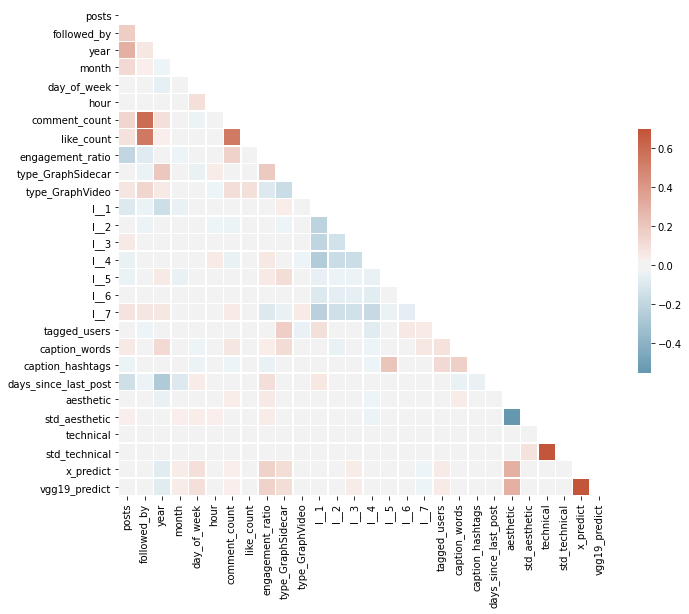

In [27]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

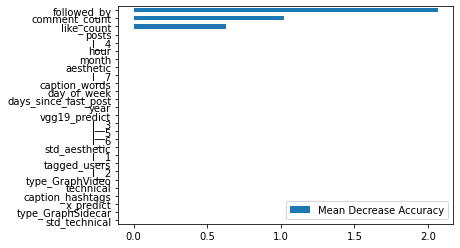

In [32]:
X = df.drop('engagement_ratio', axis = 1).copy()
y = df['engagement_ratio']

rf = RandomForestRegressor()
scores = defaultdict(list)


names = X_train.columns
 
rf = RandomForestRegressor()
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    rf.fit(X_train, y_train)
    acc = r2_score(y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh');

In [38]:
X_train, X_test, y_train, y_test = get_train_test_split(df)

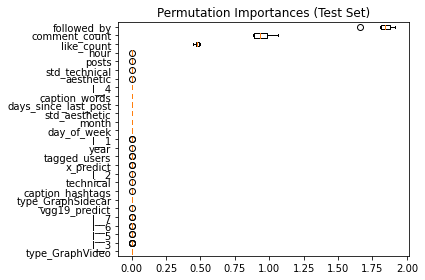

In [39]:
#permutation feature importances
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()

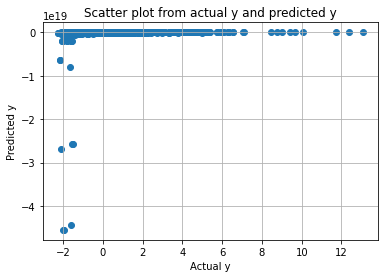

Mean Squared Error : 7.381134743632747e+36


In [40]:
#linear regression
# SkLearn SGD classifier
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, y_train)
y_pred_sksgd=clf_.predict(X_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

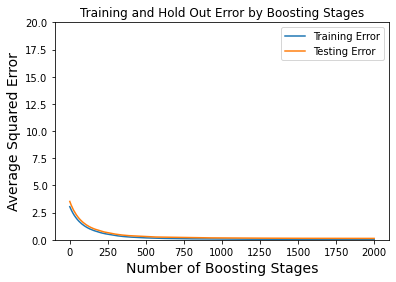

In [42]:
N_ESTIMATORS = 2000
model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, 
                                  learning_rate=0.01)

model.fit(X_train, y_train)

train_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_train)):
    train_score[i] = model.loss_(y_train, y_pred)

test_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)
    
plt.plot(np.arange(N_ESTIMATORS) + 1, train_score,
        label="Training Error")
plt.plot(np.arange(N_ESTIMATORS) + 1, test_score,
        label="Testing Error")
plt.title("Training and Hold Out Error by Boosting Stages")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)
plt.legend(loc="upper right")
_ = plt.ylim([0, 20])
# plt.savefig('plots/training-and-testing-error.png', bbox_inches='tight')

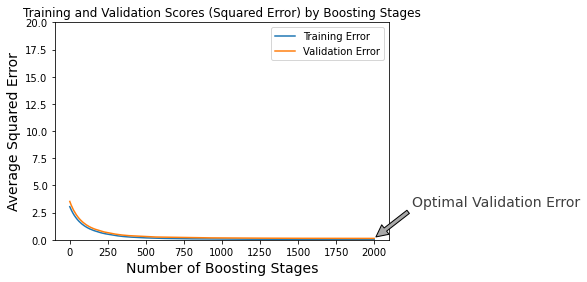

In [43]:

# Estimating the optimal number of boosters using a validation set
optimal_n_trees = np.argmin(test_score)
optimal_score = test_score[optimal_n_trees]

plt.plot(np.arange(N_ESTIMATORS) + 1, train_score,
        label="Training Error")
plt.plot(np.arange(N_ESTIMATORS) + 1, test_score,
        label="Validation Error")

optimal_point = (optimal_n_trees, optimal_score)
plt.annotate('Optimal Validation Error', optimal_point,
              xytext=(optimal_point[0] + 250, optimal_point[1] + 3),
              arrowprops=dict(facecolor="darkgrey", shrink=0.05),
              fontsize=14,
              alpha=0.75)

plt.title("Training and Validation Scores (Squared Error) by Boosting Stages")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)
plt.legend(loc="upper right")
_ = plt.ylim([0, 20])

# plt.savefig('plots/training-and-testing-error-with-optima.png', bbox_inches='tight')

In [44]:

# Tuning by cross validation
N_ESTIMATORS = 4000
N_FOLDS = 5

train_scores = np.zeros((N_FOLDS, N_ESTIMATORS))
test_scores  = np.zeros((N_FOLDS, N_ESTIMATORS))

folds = cv.KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

for k, (train_idxs, test_idxs) in enumerate(folds.split(X)):
    X_train, y_train = X.iloc[train_idxs, :], y.iloc[train_idxs]
    X_test, y_test = X.iloc[test_idxs, :], y.iloc[test_idxs]
    model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, learning_rate=0.01)
    model.fit(X_train, y_train)
    for i, y_pred in enumerate(model.staged_predict(X_train)):
        train_scores[k, i] = model.loss_(y_train, y_pred)
    for i, y_pred in enumerate(model.staged_predict(X_test)):
        test_scores[k, i] = model.loss_(y_test, y_pred)
        
mean_train_score = np.mean(train_scores, axis=0)
mean_test_score  = np.mean(test_scores, axis=0)

optimal_n_trees = np.argmin(mean_test_score)
optimal_score = mean_test_score[optimal_n_trees]
optimal_point = (optimal_n_trees, optimal_score)
_ = os.system('say "your program has finished"')

In [45]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1,
                 subsample=0.5,
                 model=DecisionTreeRegressor,
                 loss='mse',
                 **kwargs):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.loss = loss
        self.model = model
        if loss not in ('mse', 'mae'):
            raise ValueError("Loss must be 'mse' or 'mae'")
        self.kwargs = kwargs
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)
        
        # NB: it would be easier to call the predict method
        # of this model and avoid duplicated code, but that
        # adds a O(n**2) term in the number of estimators
        # because earlier estimators are called multiple
        # times during fitting
        prediction = np.zeros(len(y))
        for i in range(self.n_estimators):
            prediction = prediction + self.estimators[i].predict(X)
            
            if self.loss == 'mae':
                target = self.learning_rate * np.sign(y - prediction)
            else:
                target = self.learning_rate * (y - prediction)
            estimator = self.model(**self.kwargs)
            
            subsample_idx = np.random.choice(range(len(X)),
                                             round(self.subsample * len(X)),
                                             replace=False)
            estimator.fit(X.iloc[subsample_idx],
                          target.iloc[subsample_idx])
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

In [46]:
for n_estimators in [20, 50, 100, 200, 400]:
    for loss in ['mse', 'mae']:
        model = GradientBoostedRegressor(n_estimators=n_estimators,
                                         learning_rate=0.1,
                                         max_depth=5,
                                         loss=loss)
        model.fit(X_train, y_train)
        print("n_estimators = {:4} and loss = {:3} -> MSE: {:6.3f} MAE: {:6.3f}".format(n_estimators,
            loss,
            ((y_test-model.predict(X_test))**2).mean(),
            np.abs(y_test-model.predict(X_test)).mean()))

n_estimators =   20 and loss = mse -> MSE:  0.341 MAE:  0.361
n_estimators =   20 and loss = mae -> MSE:  1.289 MAE:  0.417
n_estimators =   50 and loss = mse -> MSE:  0.132 MAE:  0.183
n_estimators =   50 and loss = mae -> MSE:  0.811 MAE:  0.318
n_estimators =  100 and loss = mse -> MSE:  0.095 MAE:  0.159
n_estimators =  100 and loss = mae -> MSE:  0.516 MAE:  0.292
n_estimators =  200 and loss = mse -> MSE:  0.081 MAE:  0.146
n_estimators =  200 and loss = mae -> MSE:  0.455 MAE:  0.321
n_estimators =  400 and loss = mse -> MSE:  0.104 MAE:  0.154
n_estimators =  400 and loss = mae -> MSE:  0.384 MAE:  0.370


In [47]:
from sklearn.linear_model import LinearRegression
for n_estimators in [1, 5, 20, 100]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.1,
                                     model=LinearRegression)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("MSE for Linear Regression = {:3}: {}".format(n_estimators,
        ((y_test-lr_model.predict(X_test))**2).mean()))

MSE for n_estimators =   1: 3.1891776554133386
MSE for n_estimators =   5: 3.8763841833896215
MSE for n_estimators =  20: 2.513519939381602
MSE for n_estimators = 100: 3.341193044650241
MSE for Linear Regression = 100: 2.8626470227710885


In [48]:
for n_estimators in [1, 5, 20, 100, 200, 500, 1000]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.02,
                                     model=KNeighborsRegressor)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
print("MSE for KNN = {:3}: {}".format(n_estimators,
        ((y_test-knn_model.predict(X_test))**2).mean()))

MSE for n_estimators =   1: 3.1863656922303063
MSE for n_estimators =   5: 2.904908401467951
MSE for n_estimators =  20: 2.1724528646567487
MSE for n_estimators = 100: 1.0454046304149138
MSE for n_estimators = 200: 0.9497122809068149
MSE for n_estimators = 500: 1.3742714272591725
MSE for n_estimators = 1000: 6.3369795489799525
MSE for KNN = 1000: 1.0592542544116794


In [ ]:
for n_estimators in [20, 100, 200, 1000, 2000]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.001,
                                     model=RandomForestRegressor)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print("MSE for RF = {:3}: {}".format(n_estimators,
        ((y_test-rf_model.predict(X_test))**2).mean()))

MSE for n_estimators =  20: 3.149992844732945
MSE for n_estimators = 100: 2.7498510727636107
MSE for n_estimators = 200: 2.3245989075119304


In [ ]:
for n_estimators in [1, 5, 20, 100, 200, 500, 1000, 2000]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.02,
                                     model=AdaBoostRegressor)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print("MSE for AB = {:3}: {}".format(n_estimators,
        ((y_test-rf_model.predict(X_test))**2).mean()))

In [ ]:
sns.catplot(x="engagement_label", y="engagement_ratio", kind="box", data=df);

In [ ]:
sns.catplot(x="engagement_label", y="like_ratio", kind="box", data=df);

In [ ]:
sns.regplot(x="engagement_ratio", y="followed_by", data=df[(df['followed_by'] > 100) & (df['followed_by'] <= 3000)]);